# 1. Import Needed Libraries

In [1]:
import camelot as cm
import pandas as pd
#below check available files in folder

# 2. Read PDF files with Camelot

In [2]:
#! dir  check files in directory

In [3]:
#2 flavors, stream or lattice. Stream more suitable for this one
#can specify pages to read from the souce file
input_pdf = cm.read_pdf("NASAAviationCSR.pdf",flavor='stream',pages='5,6')

In [4]:
#check # of tables loaded
print(input_pdf) 

#check each tables size to help identify the areas we are looking for
for n in input_pdf:
    print(n)
    
#check the selected table
input_pdf[1].df

<TableList n=3>
<Table shape=(28, 6)>
<Table shape=(28, 6)>
<Table shape=(12, 3)>


,0,1,2,3,4,5
0,,Units,T+W301-DD,T+W301-GTF,HWB301-DD,HWB301-GTF
1,TOGW,lb,"570,195","570,533","537,641","534,491"
2,OEW,lb,"265,290","270,084","251,281","253,326"
3,Payload,lb,"118,100","118,100","118,100","118,100"
4,Total Fuel,lb,"186,805","182,349","168,259","163,065"
5,Wing Span,ft,226.5,226.6,250,250
6,Takeoff Field Length,ft,"9,231","9,019","9,171","8,541"
7,Main Gear Type,,6 wheel 777-like,6 wheel 777-like,6 wheel 777-like,6 wheel 777-like
8,Main Gear Strut Length,ft,17.1,19.2,7.4,7.4
9,Thrust per Engine,lb,"71,800","74,000","65,989","69,398"


# 3. Load needed information to Pandas DF

In [5]:
#getting all rows needed
df0 = input_pdf[1].df
df1 = input_pdf[1].df
df2 = input_pdf[1].df

df0 = df1.loc[0:0,0:5] #for header renaming
df1 = df1.loc[12:13,0:5]
df2 = df2.loc[24:26,0:5]

In [6]:
#combining needed tables (without headers for now)
df = pd.concat([df1, df2])
df

,0,1,2,3,4,5
12,Inlet Liner Length/D,,0.33,0.33,0.33,0.33
13,Aft Duct Liner Length/H,,2.96,1.57,3.33,1.99
24,Lift/Drag,,8.94,8.95,11.04,11.04
25,Bypass Ratio,,21.99,32.21,19.17,27.81
26,Fan Pressure Ratio,,1.08,1.06,1.07,1.05


# 4. Process, clean, rename the data

In [7]:
df = df.reset_index(drop = True) #restructure the index to start with 1
df

,0,1,2,3,4,5
0,Inlet Liner Length/D,,0.33,0.33,0.33,0.33
1,Aft Duct Liner Length/H,,2.96,1.57,3.33,1.99
2,Lift/Drag,,8.94,8.95,11.04,11.04
3,Bypass Ratio,,21.99,32.21,19.17,27.81
4,Fan Pressure Ratio,,1.08,1.06,1.07,1.05


In [8]:
# Converting string to float so we can do further analysis
df.loc[:,2:5] = df.loc[:,2:5].astype(float)
#df

In [9]:
# Final cleaning/renaming before output

# Renaming the columns using first row
# df.columns = ["T+W301-GTF","HWB301-GTF"] #renaming the column using names
df.columns = df0.iloc[0] # renaming the columns using the first row

# rename empty column 
df = df.rename(columns={'':'Rate'})

#Drop unneeded column before output
finalDf = df.drop(columns=['Units'], axis=1)
finalDf

,Rate,T+W301-DD,T+W301-GTF,HWB301-DD,HWB301-GTF
0,Inlet Liner Length/D,0.33,0.33,0.33,0.33
1,Aft Duct Liner Length/H,2.96,1.57,3.33,1.99
2,Lift/Drag,8.94,8.95,11.04,11.04
3,Bypass Ratio,21.99,32.21,19.17,27.81
4,Fan Pressure Ratio,1.08,1.06,1.07,1.05


# 5. Ouput file to CSV and Excel format

In [10]:
finalDf.to_csv("packt_output_csv.csv") #writing output to csv
finalDf.to_excel("packt_output_excel.xlsx") #writing output to xlsx

# 6. (Optional) Input data for plot

In [11]:
#starting from here we can read the csv and do some analysis/ plot drawing

dfInput = pd.read_csv("packt_output_csv.csv")
dfInput

,Unnamed: 0,Rate,T+W301-DD,T+W301-GTF,HWB301-DD,HWB301-GTF
0,0,Inlet Liner Length/D,0.33,0.33,0.33,0.33
1,1,Aft Duct Liner Length/H,2.96,1.57,3.33,1.99
2,2,Lift/Drag,8.94,8.95,11.04,11.04
3,3,Bypass Ratio,21.99,32.21,19.17,27.81
4,4,Fan Pressure Ratio,1.08,1.06,1.07,1.05


In [12]:
# melt will convert the df from wide format to long format
# first drop the unnamed first column 
dfInput = dfInput.drop(columns=['Unnamed: 0'], axis=1)
#column (2001 2011) to rows with column name year and percentage(for value)
df_melted = dfInput.melt('Rate', var_name='PlaneType', value_name='percentage')
df_melted

,Rate,PlaneType,percentage
0,Inlet Liner Length/D,T+W301-DD,0.33
1,Aft Duct Liner Length/H,T+W301-DD,2.96
2,Lift/Drag,T+W301-DD,8.94
3,Bypass Ratio,T+W301-DD,21.99
4,Fan Pressure Ratio,T+W301-DD,1.08
5,Inlet Liner Length/D,T+W301-GTF,0.33
6,Aft Duct Liner Length/H,T+W301-GTF,1.57
7,Lift/Drag,T+W301-GTF,8.95
8,Bypass Ratio,T+W301-GTF,32.21
9,Fan Pressure Ratio,T+W301-GTF,1.06


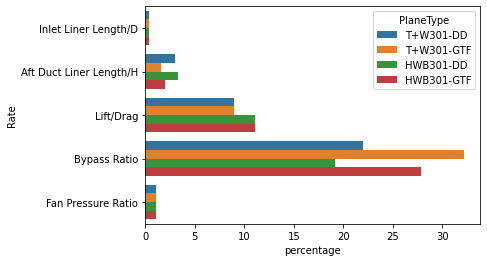

In [13]:
#Draw the Plot
import seaborn as sns
#makes a bar chart x-axis = KPI, y-axis = percentage, hue = bar_comparison
sns.barplot(x = "percentage", y = "Rate", hue = "PlaneType", data = df_melted, linewidth=25);